# Problem Statement

E-commerce sites such as amazon,flipkart,ebay sell lakhs of products/min . Hence, a huge amount of data will be created. 
Such as productID,Product Name,Product Quantity,Price of Product etc. 
So, we can analyse most sold products together. Also, we can find the highest sales in any particular month. 

# How to read Feather data

"Feather" is a binary file format designed for fast, efficient storage and retrieval of large datasets, particularly in data science workflows.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
!pip install pyarrow

In [9]:
all_data = pd.read_feather(r"D:\Sales Analysis\Sales_data.ftr")

In [11]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [28]:
all_data = all_data.dropna(how='all')
# Dropping those rows where the whole row has null values

In [30]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [32]:
all_data.duplicated().sum()

0

In [34]:
all_data = all_data.drop_duplicates()

In [36]:
all_data.shape

(185687, 6)

In [38]:
all_data.duplicated().sum()

0

# Analyzing monthly sales

In [41]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [43]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [47]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [55]:
'04/19/19'.split(' ')[0].split('/')[0]

'04'

In [61]:
all_data['Month'] = all_data['Order Date'].apply(lambda x: x.split(' ')[0].split('/')[0])

In [63]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [65]:
all_data['Month'].unique()

array(['04', '05', 'Order', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [67]:
filter1 = all_data['Month'] == 'Order'

In [69]:
all_data[filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order,Purchase Address,Order


In [71]:
all_data[~filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09,"511 Forest St, San Francisco, CA 94016",09


In [73]:
all_data = all_data[~filter1]

In [75]:
all_data.shape

(185686, 7)

In [79]:
all_data['Month'] = all_data['Month'].astype(int)

In [81]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [83]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [87]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [89]:
all_data.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

<Axes: xlabel='Month'>

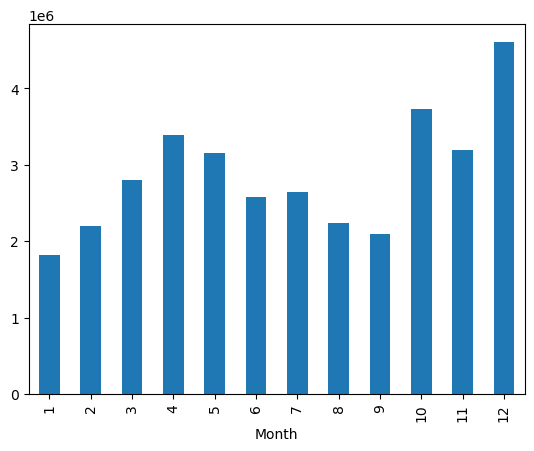

In [91]:
all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')

December month had the highest sales in all year

# Which city has the max. order

In [123]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [127]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [131]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [133]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [135]:
all_data.groupby(['city'])['Quantity Ordered'].sum()

city
Atlanta          16584
Austin           11137
Boston           22494
Dallas           16707
Los Angeles      33247
New York City    27903
Portland         14037
San Francisco    50169
Seattle          16534
Name: Quantity Ordered, dtype: int32

<Axes: ylabel='count'>

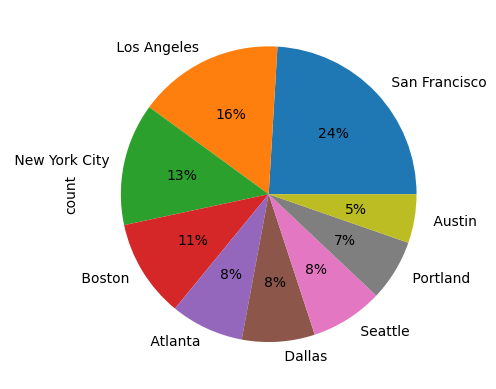

In [142]:
pd.value_counts(all_data['city']).plot(kind = 'pie' , autopct = '%1.0f%%')

San Francisco has the maximum orders

# What product got sold the most and why ?

If a product has good user rating and has low price , it will get sold much more

In [149]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sale', 'sales', 'city'],
      dtype='object')

In [159]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'})

In [163]:
count_df = count_df.reset_index()

In [165]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [169]:
products = count_df['Product'].values

Text(0, 0.5, 'Avg price of product')

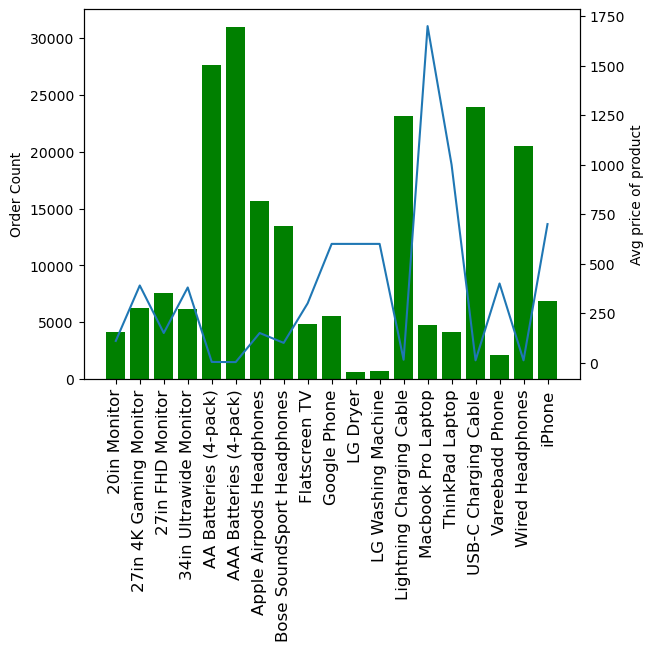

In [177]:
fig , ax1 = plt.subplots()
# Make and return a second axes that shares the *x*-axis.
ax2 = ax1.twinx()
ax1.bar(count_df['Product'], count_df['Quantity Ordered'],color='g')
ax2.plot(count_df['Product'], count_df['Price Each'])
ax1.set_xticklabels(products, rotation='vertical',fontsize= 12)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

AAA batteries are the ones which got sold the most. The reason that the AAA batteries sales are high, is because
the price of the product is less

# Understanding the trend about the most sold product

In [183]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object', name='Product')

In [185]:
most_sold_product = all_data['Product'].value_counts()[0:5].index

In [187]:
all_data['Product'].isin(most_sold_product)

0          True
2         False
3         False
4          True
5          True
          ...  
186845     True
186846    False
186847    False
186848    False
186849     True
Name: Product, Length: 185686, dtype: bool

In [191]:
most_sold_product_df = all_data[all_data['Product'].isin(most_sold_product)]

In [193]:
most_sold_product_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale,sales,city
0,176558,USB-C Charging Cable,2,11.95,04,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04,"381 Wilson St, San Francisco, CA 94016",4,11.95,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04,"790 Ridge St, Atlanta, GA 30301",4,11.95,11.95,Atlanta


In [195]:
most_sold_product_df.groupby(['Month','Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [199]:
pivot = most_sold_product_df.groupby(['Month','Product']).size().unstack()

In [201]:
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

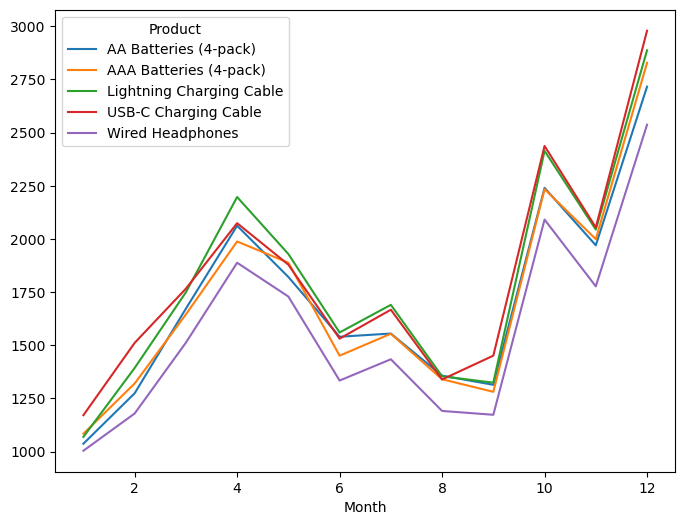

In [205]:
pivot.plot(figsize=(8,6))

# What products are most often sold together

In [208]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sale', 'sales', 'city'],
      dtype='object')

In [210]:
all_data['Order ID']

0         176558
2         176559
3         176560
4         176560
5         176561
           ...  
186845    259353
186846    259354
186847    259355
186848    259356
186849    259357
Name: Order ID, Length: 185686, dtype: object

In [212]:
# duplicated order IDs signifies that the products are being sold together.

In [218]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep=False)]

In [220]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale,sales,city
3,176560,Google Phone,1,600.00,04,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04,"20 Hill St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04,"20 Hill St, Los Angeles, CA 90001",4,11.95,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04,"365 Center St, San Francisco, CA 94016",4,5.98,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09,"106 7th St, Atlanta, GA 30301",9,3.84,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09,"241 Highland St, Atlanta, GA 30301",9,11.99,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09,"241 Highland St, Atlanta, GA 30301",9,5.98,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09,"519 Maple St, San Francisco, CA 94016",9,600.00,600.00,San Francisco


In [228]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns={'Product':'Grouped Products'})

In [232]:
dup_products_df = df_duplicated.merge(dup_products,how='left',on='Order ID')

In [234]:
dup_products_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sale,sales,city,Grouped Products
0,176560,Google Phone,1,600.00,04,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04,"20 Hill St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04,"20 Hill St, Los Angeles, CA 90001",4,11.95,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04,"365 Center St, San Francisco, CA 94016",4,5.98,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09,"106 7th St, Atlanta, GA 30301",9,3.84,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09,"241 Highland St, Atlanta, GA 30301",9,11.99,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09,"241 Highland St, Atlanta, GA 30301",9,5.98,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09,"519 Maple St, San Francisco, CA 94016",9,600.00,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [240]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='count'>

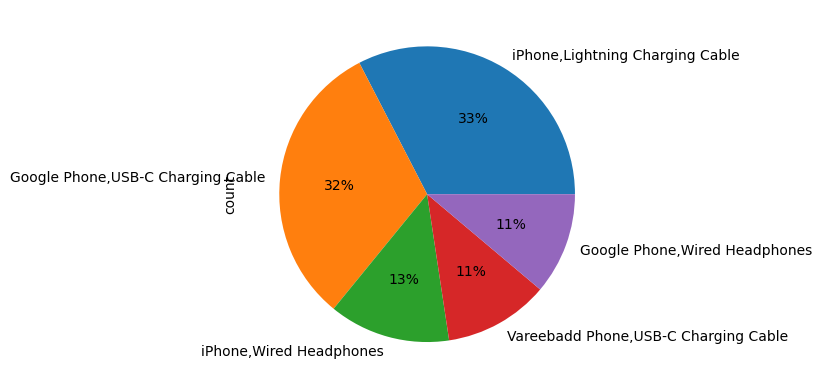

In [252]:
no_dup_df['Grouped Products'].value_counts()[0:5].plot(kind = 'pie' , autopct = '%1.0f%%')